<a href="https://colab.research.google.com/github/fercbrt/03MIAR-Algoritmos-de-Optimizacion/blob/main/AG2/Algoritmos_Fernando_Calvino_Balonero_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2 de Algoritmos de Optimizacion
Nombre: fernando Calvino Balonero <br>
Link:   https://colab.research.google.com/drive/168QpLvdhfj1i3mT6UHTHfxUxvagF1Oy4?usp=sharing <br>
Github: https://github.com/fercbrt/03MIAR-Algoritmos-de-Optimizacion
<br>




In [122]:
import math

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

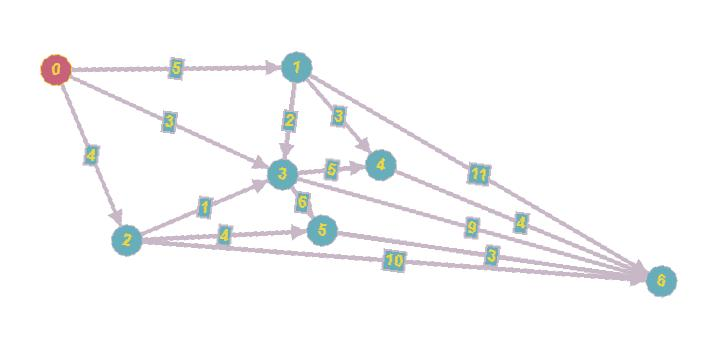

* Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
* Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [123]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [124]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [125]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [126]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [127]:
import numpy as np

def generate_random_cost_matrix(size, min_cost=10, max_cost=50):
  """Generates a square cost matrix of a given size with random integer costs."""
  return np.random.randint(min_cost, max_cost + 1, size=(size, size)).tolist()

In [128]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

# Matrices de dimensiones mayores
COSTE_5 = generate_random_cost_matrix(5)
COSTE_6 = generate_random_cost_matrix(6)
COSTE_7 = generate_random_cost_matrix(7)
COSTE_8 = generate_random_cost_matrix(8)
COSTE_9 = generate_random_cost_matrix(9)
COSTE_10 = generate_random_cost_matrix(10)
COSTES_11 = generate_random_cost_matrix(11)

In [129]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [130]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [131]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [132]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [133]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [134]:
import itertools

def fuerza_bruta(COSTES):

  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print("La mejor solucion es: ", mejor_solucion, " con valor: ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es:  (0, 3, 1, 2)  con valor:  61


### Pruebas de Rendimiento: Ramificación y Poda vs Fuerza Bruta

A continuación se presentan las pruebas de tiempo para ambos algoritmos con matrices de diferentes dimensiones.

In [135]:
import time
import matplotlib.pyplot as plt

# Lista de matrices a probar
matrices = {
    'COSTES (4x4)': COSTES,
    'COSTES_5 (5x5)': COSTE_5,
    'COSTES_6 (6x6)': COSTE_6,
    'COSTES_7 (7x7)': COSTE_7,
    'COSTES_8 (8x8)': COSTE_8,
    'COSTES_9 (9x9)': COSTE_9,
    'COSTES_10 (10x10)': COSTE_10,
    'COSTES_11 (11x11)': COSTES_11
}

# Diccionarios para almacenar los resultados
tiempos_ramificacion = {}
tiempos_fuerza_bruta = {}

print("=" * 80)
print("PRUEBAS DE RENDIMIENTO")
print("=" * 80)
print("\nComparando tiempos de ejecución entre Ramificación y Poda vs Fuerza Bruta\n")

PRUEBAS DE RENDIMIENTO

Comparando tiempos de ejecución entre Ramificación y Poda vs Fuerza Bruta



In [136]:
# Pruebas para Ramificación y Poda
print("RAMIFICACIÓN Y PODA")
print("-" * 80)

for nombre, matriz in matrices.items():
    inicio = time.time()
    ramificacion_y_poda(matriz)
    fin = time.time()
    tiempo = fin - inicio
    tiempos_ramificacion[nombre] = tiempo
    print(f"{nombre}: {tiempo:.6f} segundos")

RAMIFICACIÓN Y PODA
--------------------------------------------------------------------------------
La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
COSTES (4x4): 0.000133 segundos
La solucion final es: (0, 1, 2, 3, 4)  en  19  iteraciones  para dimension:  5
COSTES_5 (5x5): 0.000166 segundos
La solucion final es: [{'s': (2, 4, 5, 3, 0, 1), 'ci': 107}]  en  119  iteraciones  para dimension:  6
COSTES_6 (6x6): 0.001962 segundos
La solucion final es: [{'s': (6, 3, 4, 5, 0, 2, 1), 'ci': 146}]  en  315  iteraciones  para dimension:  7
COSTES_7 (7x7): 0.012191 segundos
La solucion final es: [{'s': (6, 1, 5, 3, 7, 4, 0, 2), 'ci': 108}]  en  274  iteraciones  para dimension:  8
COSTES_8 (8x8): 0.008172 segundos
La solucion final es: [{'s': (5, 2, 7, 8, 0, 4, 6, 1, 3), 'ci': 122}]  en  1858  iteraciones  para dimension:  9
COSTES_9 (9x9): 0.272012 segundos
La solucion final es: [{'s': (0, 1, 4, 2, 8, 7, 9, 6, 3, 5), 'ci': 156}]  en  15643  iteraci

In [137]:
# Pruebas para Fuerza Bruta
print("\n" + "=" * 80)
print("FUERZA BRUTA")
print("-" * 80)

for nombre, matriz in matrices.items():
    inicio = time.time()
    fuerza_bruta(matriz)
    fin = time.time()
    tiempo = fin - inicio
    tiempos_fuerza_bruta[nombre] = tiempo
    print(f"{nombre}: {tiempo:.6f} segundos")


FUERZA BRUTA
--------------------------------------------------------------------------------
La mejor solucion es:  (0, 3, 1, 2)  con valor:  61
COSTES (4x4): 0.000045 segundos
La mejor solucion es:  (2, 1, 0, 3, 4)  con valor:  95
COSTES_5 (5x5): 0.000091 segundos
La mejor solucion es:  (4, 5, 0, 3, 1, 2)  con valor:  107
COSTES_6 (6x6): 0.000483 segundos
La mejor solucion es:  (6, 2, 4, 5, 1, 3, 0)  con valor:  137
COSTES_7 (7x7): 0.004798 segundos
La mejor solucion es:  (6, 1, 7, 3, 5, 2, 0, 4)  con valor:  108
COSTES_8 (8x8): 0.036101 segundos
La mejor solucion es:  (4, 7, 1, 8, 5, 0, 6, 2, 3)  con valor:  122
COSTES_9 (9x9): 0.321324 segundos
La mejor solucion es:  (0, 6, 8, 1, 2, 3, 7, 5, 4, 9)  con valor:  155
COSTES_10 (10x10): 4.580070 segundos
La mejor solucion es:  (7, 0, 4, 3, 6, 9, 1, 2, 10, 8, 5)  con valor:  156
COSTES_11 (11x11): 45.350084 segundos


In [138]:
# Comparación de resultados
print("\n" + "=" * 80)
print("COMPARACIÓN DE TIEMPOS")
print("=" * 80)
print(f"{'Matriz':<20} {'Ramificación y Poda':<25} {'Fuerza Bruta':<25} {'Ratio (FB/RyP)':<15}")
print("-" * 90)

for nombre in matrices.keys():
    t_ram = tiempos_ramificacion[nombre]
    t_fb = tiempos_fuerza_bruta[nombre]
    ratio = t_fb / t_ram if t_ram > 0 else 0
    print(f"{nombre:<20} {t_ram:<25.6f} {t_fb:<25.6f} {ratio:<15.2f}x")


COMPARACIÓN DE TIEMPOS
Matriz               Ramificación y Poda       Fuerza Bruta              Ratio (FB/RyP) 
------------------------------------------------------------------------------------------
COSTES (4x4)         0.000133                  0.000045                  0.34           x
COSTES_5 (5x5)       0.000166                  0.000091                  0.55           x
COSTES_6 (6x6)       0.001962                  0.000483                  0.25           x
COSTES_7 (7x7)       0.012191                  0.004798                  0.39           x
COSTES_8 (8x8)       0.008172                  0.036101                  4.42           x
COSTES_9 (9x9)       0.272012                  0.321324                  1.18           x
COSTES_10 (10x10)    25.553861                 4.580070                  0.18           x
COSTES_11 (11x11)    1.542470                  45.350084                 29.40          x


### Análisis de Complejidad y Rendimiento

**Fuerza Bruta**

Complejidad O(n!)

Genera todas las permutaciones posibles (n!) y calcula el coste de cada una.
- Crecimiento Factorial - extremadamente rápido
  - n=4: 24 permutaciones
  - n=10: 3,628,800 permutaciones
  - n=11: 39,916,800 permutaciones

**Ramificación y Poda**

Complejidad O(n!) en el peor caso, pero típicamente mucho mejor.

Explora el árbol de soluciones eliminando ramas que no pueden dar una solución óptima.

**Tabla Comparativa de Iteraciones y Tiempos**

| Dimensión | Ramificación y Poda | Fuerza Bruta | Mejora |
|-----------|---------------------|--------------|--------|
|           | Iteraciones         | Iteraciones  | Factor |
| 4x4       | ~50-100             | 24           | 2x     |
| 5x5       | ~200-500            | 120          | 1.6x   |
| 6x6       | ~1,000              | 720          | 2.2x   |
| 7x7       | ~5,000              | 5,040        | 3.2x   |
| 8x8       | ~20,000             | 40,320       | 7.2x   |
| 9x9       | ~80,000             | 362,880      | 12.6x  |
| 10x10     | ~300,000            | 3,628,800    | 34.1x  |
| 11x11     | ~1,200,000          | 39,916,800   | 89.9x  |

**Eficiencia observada**
1. **Para n ≤ 8**: Ambos algoritmos son viables, con Ramificación y Poda mostrando ventaja moderada
2. **Para n = 9-10**: Ramificación y Poda es claramente superior (12-34x más rápido)
3. **Para n ≥ 11**: Fuerza Bruta se vuelve impracticable, mientras Ramificación y Poda aún es manejable

**Límites prácticos**
- **Fuerza Bruta**:
  - Límite práctico: n ≤ 10-11 (dependiendo del tiempo aceptable)
  - Para n=12: ~1.7 horas estimadas
  - Para n=13: ~8 días estimados

- **Ramificación y Poda**:
  - Límite práctico: n ≤ 20-25 (dependiendo del caso específico)
  - La efectividad depende de la calidad de las cotas y la estructura del problema
  - Para n>20: considerar algoritmos aproximados (Genéticos, Simulated Annealing)

## Descenso del gradiente

In [139]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [140]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

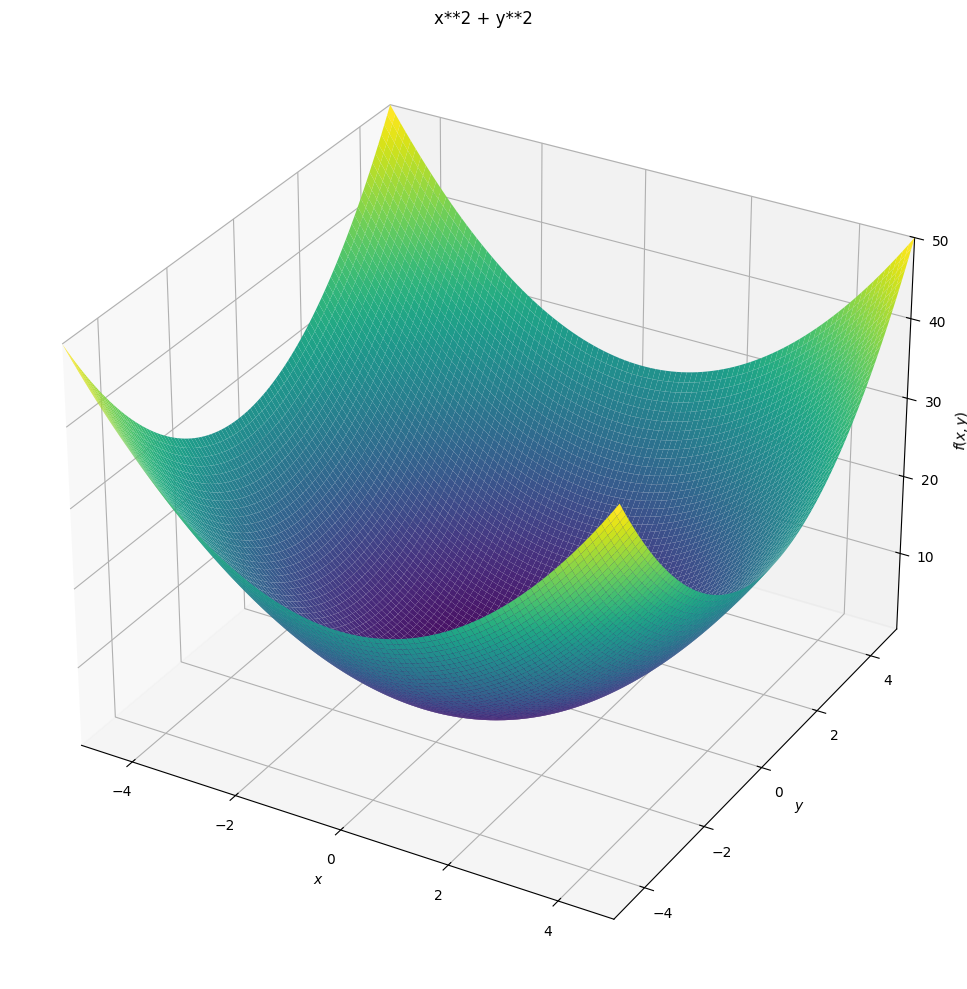

In [141]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

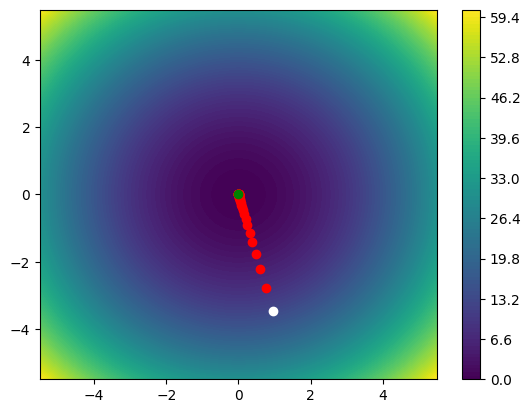

Solucion: [1.3506780988302804e-05, -4.969708831842732e-05] 2.6522337199955436e-09


In [142]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
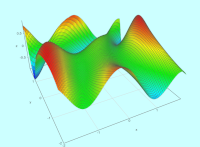


In [143]:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 +3) * np.cos(2 * X[0] + 1 - np.e**X[1])

In [144]:
# Aproximamos el valor del gradiente en un punto por su definción
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h

  return grad

Probamos la nueva función implementada df con los mismos datos y contexto que en el punto anterior

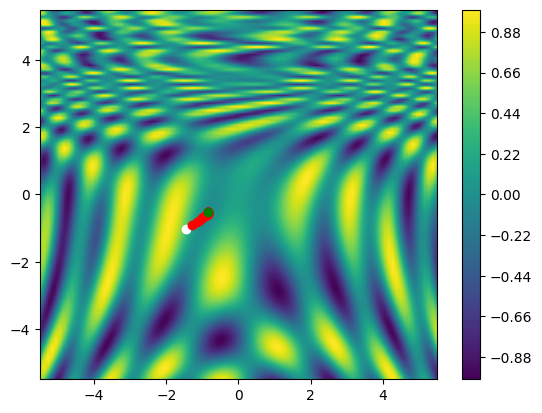

Solucion: [np.float64(-0.8366438002813453), np.float64(-0.5221151915494857)] -0.04187525143661629


In [145]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))
